# Solucion al ejercicio

## No lo mires si no has intentado hacerlo primero

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## ¿Seguro que lo quieres mirar?

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## OK, aquí está


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def distancia_ascensor(A, B):
    # Desempaquetar las coordenadas de los puntos A y B
    x1, y1 = A
    x2, y2 = B

    # Si los puntos están en distinta vertical
    if x1 != x2 :
        # Calcular la distancia vertical desde A hasta el eje X (planta baja)
        distancia_vertical_A = abs(y1)
        # Calcular la distancia horizontal desde el eje X hasta la vertical del punto B
        distancia_horizontal = abs(x2 - x1)
        # Calcular la distancia vertical desde la vertical del punto B hasta B
        distancia_vertical_B = abs(y2)
        # Calcular la distancia total sumando las distancias verticales y horizontales
        distancia_total = distancia_vertical_A + distancia_horizontal + distancia_vertical_B

    else: # Los puntos están en la misma vertical
        distancia_total = abs(y1 - y2)

    return distancia_total

In [4]:
def a_distancia(A,B):
    return distancia_ascensor(A,B) <= 1

In [5]:
# Genera los puntos 
def puntos_candidatos(punto_central, num_puntos = 10):  
    x_central, y_central = punto_central
    x_min = x_central - 1
    x_max = x_central + 1
    y_min = y_central - 1
    y_max = y_central + 1

    puntos_x = np.linspace(x_min, x_max, num_puntos)
    puntos_y = np.linspace(y_min, y_max, num_puntos)

    candidatos = np.meshgrid(puntos_x, puntos_y)
    return np.dstack(candidatos).reshape(-1,2)
    # return zip(puntos_x, puntos_y)

In [6]:
def grafico_distancia(punto_central, num_puntos = 10):
    candidatos = puntos_candidatos(punto_central, num_puntos)
    cumple = np.apply_along_axis(lambda row: a_distancia(punto_central, row), axis=1, arr=candidatos)
    cumplen = candidatos[cumple]

    # Puede que no haya ningún punto a distancia < 1
    if cumplen.size > 0:
        x, y = zip(*cumplen)
        plt.scatter(x, y, color='gray', label='Puntos', s=3)
    
    # Agregar el punto central
    x_central, y_central = punto_central
    plt.scatter(x_central, y_central, color='red', label='Punto Central')

    # Set limits for x and y axes centered at (0, 0)
    max_abs = max(max(abs(min(x)), abs(max(x))), max(abs(min(y)), abs(max(y))))
    plt.xlim(-max_abs, max_abs)
    plt.ylim(-max_abs, max_abs)
    
    # Configuraciones adicionales
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title('Scatter Plot con Función Condicional')
    plt.legend()
    plt.grid(True)
    
    # Mostrar el gráfico
    plt.show()

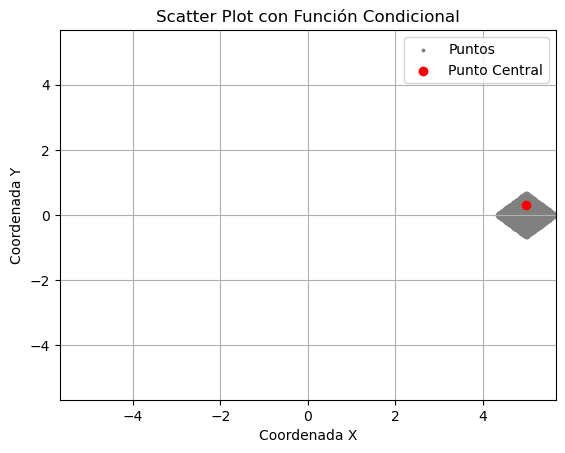

In [7]:
grafico_distancia((5,0.3), 100)